In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(centers=3, random_state=42)

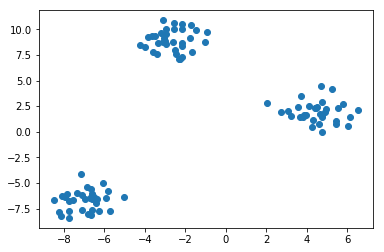

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [9]:
class Cluster:
    
    def __init__(self, label, center):
        self.center = center
        self.points = []
        self.label = label
        
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())
        
    

In [4]:
class KMeansCustom:
    
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        
    def fit(self, X):
        
        self.__X = X
        
        
        self.__clusters = []
        
        for i in range(self.n_clusters):
            cluster = Cluster(i, random.choice(X))
            self.__clusters.append(cluster)
        
        
        for i in range(20):
            
            labels = []
            
            for point in X:
                dist_points = []
                for cluster in self.__clusters:
                    dist = cluster.distance(point)
                    dist_points.append((dist, cluster))
                    
                
                selected = sorted(dist_points)[0]
                selected_cluster = selected[1]
                selected_cluster.points.append(point)
                labels.append(selected_cluster.label)
            
            
            for cluster in self.__clusters:
                cluster.relocate()
                
       
        list_cc = []
        for cluster in self.__clusters:
            list_cc.append(cluster.center)
            
        self.cluster_centers_ = np.array(list_cc)
        self.labels_ = np.array(labels)
        
        
    
    def error(self):
        
        


In [27]:
model = KMeansCustom()

In [28]:
model.fit(X)

In [29]:
model.cluster_centers_

array([[-2.66780392,  8.93576069],
       [ 4.49951001,  1.93892013],
       [-6.95170962, -6.67621669]])

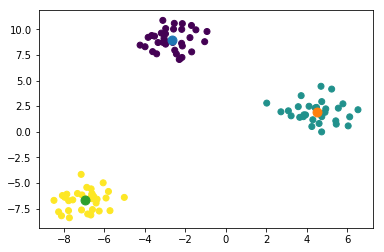

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=80)